<a href="https://colab.research.google.com/github/bisat19/KTP/blob/main/Serial_n_Paralel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-26-b222c1d38717>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


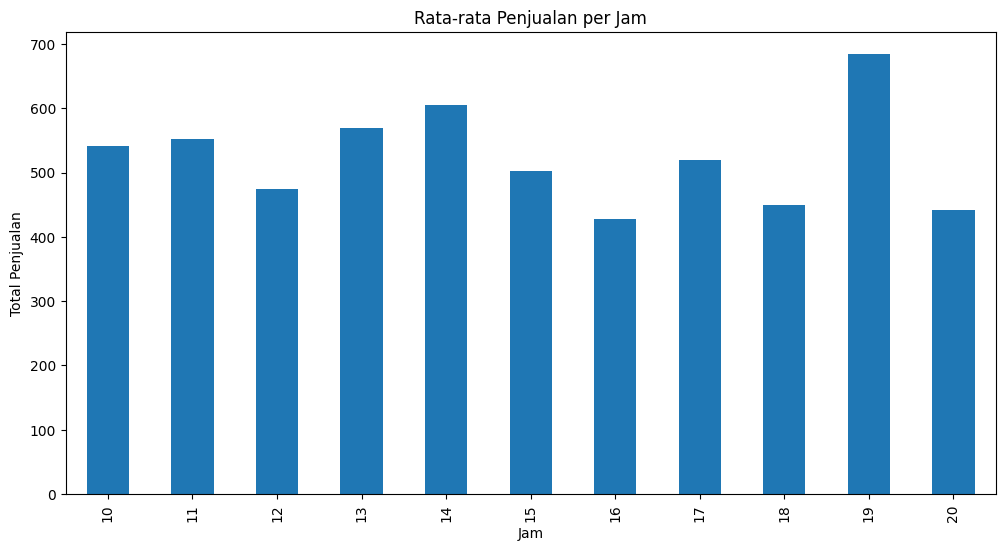

Waktu eksekusi serial: 0.20 detik


In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Pendekatan Serial
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales
# def serial():
serial_result = df.groupby('Date').apply(analyze_hourly_pattern)
avg_hourly_sales = serial_result.groupby(level=1).mean()
  # return avg_hourly_sales

end_time = time.time()

#Visualisasi
plt.figure(figsize=(12, 6))
avg_hourly_sales.plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()
#Waktu
print(f"Waktu eksekusi serial: {end_time - start_time:.2f} detik")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, fal

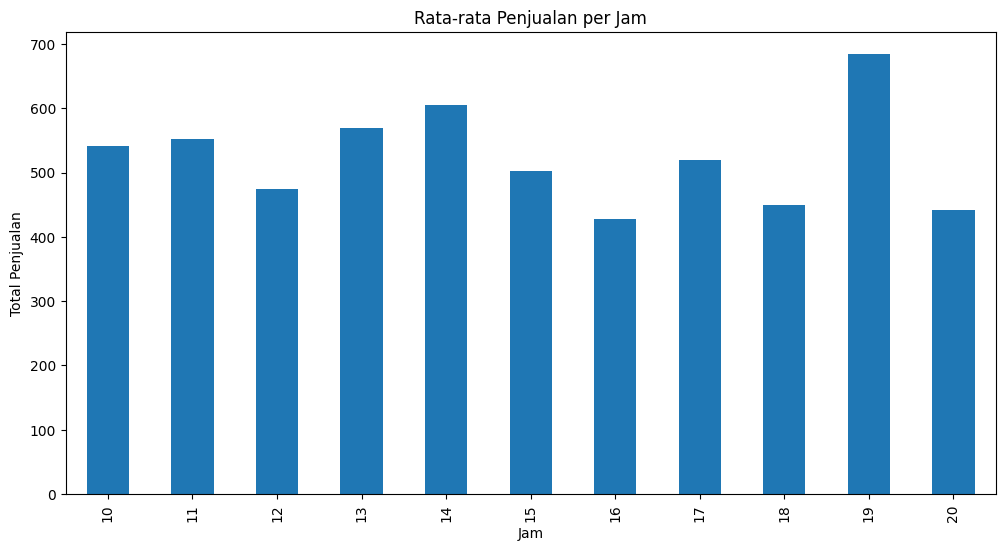

Waktu eksekusi paralel: 0.06 detik


In [22]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import dask.dataframe as dd

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
ddf = dd.from_pandas(df, npartitions=4)
ddf['Date'] = dd.to_datetime(ddf['Date'])
ddf['Time'] = dd.to_datetime(ddf['Time'])

# Pendekatan Paralel
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales
def pararel():
  result = ddf.groupby('Date').apply(analyze_hourly_pattern, meta=pd.Series(dtype='float64')).compute()
  avg_hourly_sales = result.groupby(level=1).mean()
  return avg_hourly_sales

end_time = time.time()

#Visualisasi
plt.figure(figsize=(12, 6))
pararel().plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()
#Waktu
print(f"Waktu eksekusi paralel: {end_time - start_time:.2f} detik")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:7164: UserWarning: Could not infer format, so each element will be parsed individually, fal

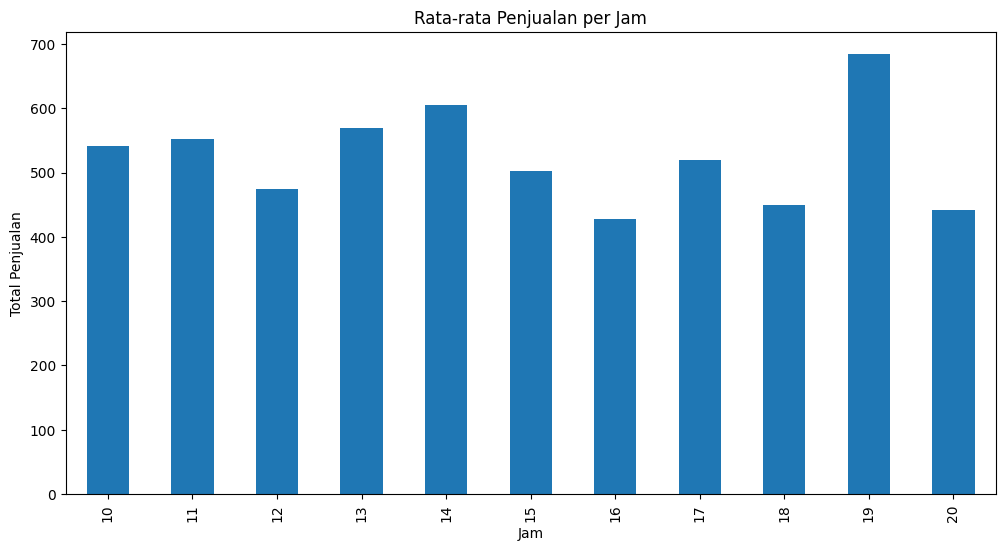

Waktu eksekusi paralel: 0.04 detik


In [24]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import dask.dataframe as dd

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
ddf = dd.from_pandas(df, npartitions=4)

# Convert 'Date' and 'Time' to datetime using map_partitions with error handling
ddf['Date'] = ddf['Date'].map_partitions(pd.to_datetime, errors='coerce', meta=(None, 'datetime64[ns]'))  # Handle errors and specify meta
ddf['Time'] = ddf['Time'].map_partitions(pd.to_datetime, errors='coerce', meta=(None, 'datetime64[ns]'))  # Handle errors and specify meta


# Pendekatan Paralel
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales

def pararel():
    result = ddf.groupby('Date').apply(analyze_hourly_pattern, meta=pd.Series(dtype='float64')).compute()
    avg_hourly_sales = result.groupby(level=1).mean()
    return avg_hourly_sales

end_time = time.time()

#Visualisasi
plt.figure(figsize=(12, 6))
pararel().plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()
#Waktu
print(f"Waktu eksekusi paralel: {end_time - start_time:.2f} detik")